# NLP Project : News Article Classification

## **Objective**
 build classification model that can automatically
 categorize news articles into different predefined categories

##  Installing and Importing library

In [3]:
import sys
print(sys.executable)


C:\Users\swapn\miniconda3\envs\tf_env\python.exe


In [4]:
!{sys.executable} -m pip install nltk


In [5]:
! pip install pandas
! pip install numpy

In [6]:
    !pip install scikit-learn

In [7]:
   ! pip install matplotlib
   ! pip install seaborn

In [8]:
# Data Handling
import pandas as pd
import numpy as np

# Text Preprocessing
import re
import string

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ML + Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [9]:
# Download necessary NLTK data
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

## Data exploration and cleaning
- Exploring data
- created new column by merging headline and  short_description column
- appling preprocess function which invole all cleaning step

In [11]:
df=pd.read_csv('data_news.csv')

In [12]:
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [13]:
df = df[['category', 'headline', 'short_description']]

In [14]:
df['text'] = df['headline']+ ' ' + df['short_description']

In [15]:
df = df[['category', 'text']]

In [16]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [17]:
df.head()

,category,text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...
3,WELLNESS,"Oh, What a Difference She Made If you want to ..."
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre..."


In [18]:
df.shape

(50000, 2)

In [19]:
df.info

<bound method DataFrame.info of        category                                               text
0      WELLNESS  143 Miles in 35 Days: Lessons Learned Resting ...
1      WELLNESS  Talking to Yourself: Crazy or Crazy Helpful? T...
2      WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...
3      WELLNESS  Oh, What a Difference She Made If you want to ...
4      WELLNESS  Green Superfoods First, the bad news: Soda bre...
...         ...                                                ...
49995    SPORTS  This Baseball Team Learned There's A Wrong Way...
49996    SPORTS  Some Young Spurs Fan Dabbed 38 Times In A Sing...
49997    SPORTS  Rasheed Wallace Ejected From Knicks-Suns Game ...
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...
49999    SPORTS  Simone Biles Isn't The Next Anyone, She's 'The...

[50000 rows x 2 columns]>

In [20]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [21]:
def preprocess(text):
    if not isinstance(text,str):
        text= str(text)
    
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)    # Remove non-alphanumeric characters and tokenize
    
    text = text.lower()  # Lowercase

    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    
    return ' '.join(words)

In [22]:
# Apply preprocessing on the 'articles' column, store cleaned version in new column
df['clean_text'] = df['text'].apply(preprocess)

# Show result with categories and cleaned articles
df[['category', 'clean_text']].head()


,category,clean_text
0,WELLNESS,143 mile 35 day lesson learned resting part tr...
1,WELLNESS,talking crazy crazy helpful think talking tool...
2,WELLNESS,crenezumab trial gauge whether alzheimer drug ...
3,WELLNESS,oh difference made want busy keep trying perfe...
4,WELLNESS,green superfoods first bad news soda bread cor...


In [23]:
df.head(20)

,category,text,clean_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,143 mile 35 day lesson learned resting part tr...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimer drug ...
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...
5,WELLNESS,Bad Love Advice: 9 Lessons To Unlearn By Carey...,bad love advice 9 lesson unlearn carey moss yo...
6,WELLNESS,The Happiest (And Unhappiest) States In The U....,happiest unhappiest state u nation general sco...
7,WELLNESS,Seaweed: The Green Superfood You're Not Eating...,seaweed green superfood eating also worth reme...
8,WELLNESS,Addicted to Food? If you look at our culture's...,addicted food look culture eating behavior cer...
9,WELLNESS,High Tech Works When It Enables High Touch Fra...,high tech work enables high touch fran ois mar...


In [24]:
print(df.columns.tolist())


['category', 'text', 'clean_text']


## Build Model
- tokenize text and maintain it's sequence
- label encoding  the categorical column
- embedding model and featuring it's layer

In [25]:
from sklearn.preprocessing import LabelEncoder


In [26]:
# Tokenize clean_articles
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences
max_len = 200
x= pad_sequences(sequences, maxlen=max_len)

# Encode category labels
le = LabelEncoder()
y = le.fit_transform(df['category'])
y = to_categorical(y)

In [27]:
print("Shape of y:", y.shape)

Shape of y: (50000, 10)


#### ANN Model creation

In [28]:
model = Sequential([
Embedding(input_dim=5000, output_dim=64, input_length=200),
 Flatten(),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')])  # Use 10 units since y.shape[1] = 10

# Compile with correct loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
df['category'].value_counts()

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64

## Train-test split and fitting model

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [31]:
print("Training shape:", x_train.shape, y_train.shape)
print("Validation shape:", x_val.shape, y_val.shape)


Training shape: (40000, 200) (40000, 10)
Validation shape: (10000, 200) (10000, 10)


In [32]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2559 - loss: 1.9861 - val_accuracy: 0.7173 - val_loss: 0.8997
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7334 - loss: 0.8536 - val_accuracy: 0.7592 - val_loss: 0.7903
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.8264 - loss: 0.5750 - val_accuracy: 0.7763 - val_loss: 0.7450
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8863 - loss: 0.3742 - val_accuracy: 0.7790 - val_loss: 0.8056
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9306 - loss: 0.2300 - val_accuracy: 0.7741 - val_loss: 0.9088


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 200, 64)               │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         819,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,419,744 (13.05 MB)

 Trainable params: 1,139,914 (4.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,279,830 (8.70 MB)

## Ploting Model Accuracy

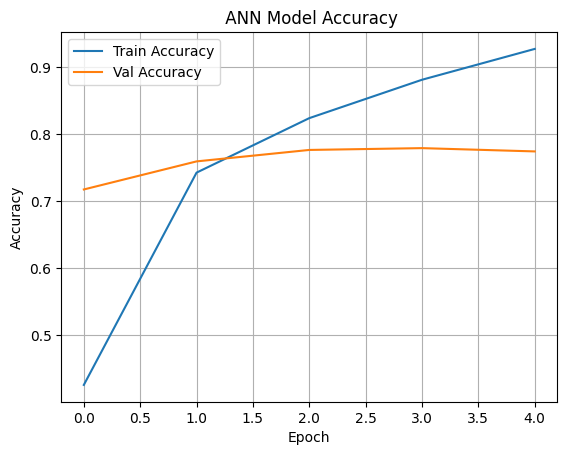

In [34]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title(' ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7771 - loss: 0.8844
Validation Accuracy: 0.77
Validation Loss: 0.91


### Inference
- Artificial Neural Network (ANN) Training Accuracy: ↑ 0.93
  Validation Accuracy: ~0.78

- Loss Trend: Validation loss fluctuated but remained under control.

- Model generalizes decently but shows signs of mild overfitting.

- Lightweight model and fast training time (~10s/epoch).

- Works well as a baseline deep learning model.

- showing generalise and good accuracy result at epoch 3

## RNN and LSTM

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout


In [46]:
rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(10, activation='softmax')   # 10 units for 10 classes
])

# Compile RNN
rnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [48]:
history_rnn=rnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 46ms/step - accuracy: 0.7982 - loss: 0.6568 - val_accuracy: 0.6215 - val_loss: 1.3121
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.8113 - loss: 0.6109 - val_accuracy: 0.6882 - val_loss: 1.1478
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.8552 - loss: 0.4785 - val_accuracy: 0.7060 - val_loss: 1.1227
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.8719 - loss: 0.4261 - val_accuracy: 0.7161 - val_loss: 1.2223
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.8928 - loss: 0.3511 - val_accuracy: 0.7037 - val_loss: 1.2683


In [39]:
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')   # 10 units for 10 classes
])

# Compile LSTM
lstm_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
history_lstm=lstm_model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 92ms/step - accuracy: 0.2915 - loss: 1.8937 - val_accuracy: 0.6563 - val_loss: 1.0372
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 91ms/step - accuracy: 0.6862 - loss: 0.9745 - val_accuracy: 0.7459 - val_loss: 0.8302
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.7998 - loss: 0.7139 - val_accuracy: 0.7659 - val_loss: 0.7951
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 92ms/step - accuracy: 0.8421 - loss: 0.5762 - val_accuracy: 0.7621 - val_loss: 0.9042
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 92ms/step - accuracy: 0.8627 - loss: 0.5021 - val_accuracy: 0.7719 - val_loss: 0.8319


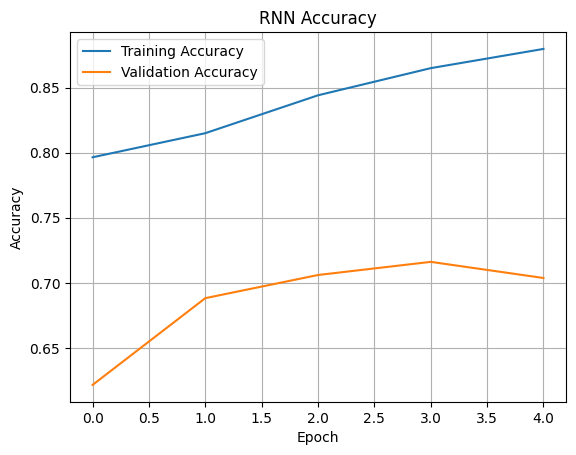

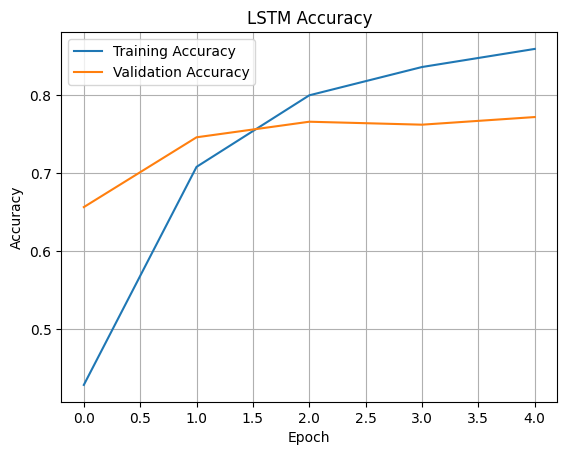

In [49]:
import matplotlib.pyplot as plt

# Plotting function
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()



# Plot RNN
plot_accuracy(history_rnn, 'RNN Accuracy')

# Plot LSTM
plot_accuracy(history_lstm, 'LSTM Accuracy')


In [50]:
loss, accuracy = rnn_model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7142 - loss: 1.2359
Validation Accuracy: 0.70
Validation Loss: 1.27


In [51]:
loss, accuracy = lstm_model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7710 - loss: 0.8280
Validation Accuracy: 0.77
Validation Loss: 0.83


## Inference

**RNN**
- Recurrent Neural Network (RNN) Training Accuracy: ↑ 0.89
Validation Accuracy: ~0.70

- overfitted more than Ann.

- Longer training time 50s+ per epoch

- Likely affected by vanishing gradient problem and lack of memory depth.

**LSTM**
- Long Short-Term Memory (LSTM) Training Accuracy: ↑ 0.86
Validation Accuracy: ~0.77

- Loss Trend: Slight overfitting after 3rd epoch.

- Very close to ANN in performance.

- Handles sequential data better.

- Long training time ~90s per epoch.


In [52]:
print("ANN Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1] * 100))
print("RNN Final Validation Accuracy: {:.2f}%".format(history_rnn.history['val_accuracy'][-1] * 100))
print("LSTM Final Validation Accuracy: {:.2f}%".format(history_lstm.history['val_accuracy'][-1] * 100))


ANN Final Validation Accuracy: 77.41%
RNN Final Validation Accuracy: 70.37%
LSTM Final Validation Accuracy: 77.19%


## Using machine learning algortihm

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the clean articles
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['text'])

# Labels (use original numerical labels, not one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['category'])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

# Predict
y_pred_lr = lr_model.predict(x_test)

# Evaluation
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 79.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       955
           1       0.77      0.78      0.77       985
           2       0.86      0.83      0.84      1021
           3       0.79      0.77      0.78      1030
           4       0.80      0.75      0.78      1034
           5       0.85      0.87      0.86       995
           6       0.88      0.82      0.85       986
           7       0.80      0.80      0.80      1008
           8       0.72      0.76      0.74      1009
           9       0.79      0.82      0.80       977

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
 [[744  18  11  13  51  16   7  12  51  32]
 [ 25 764  10  33  28  38  22  21  22  22]
 [ 23  18 844  18   6  11  18  40  37   6]
 [ 26  30  12 791  23  17  25  

- Logistic Regression Accuracy: 79.69%
F1-score: 0.80 (macro avg)

- Surprisingly strong performance for a simple model

- Low training time and Great for baseline comparison



## Support vector machine

In [64]:
from sklearn.svm import SVC

# Train
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluation
print("SVM Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 79.58%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       955
           1       0.75      0.78      0.77       985
           2       0.84      0.83      0.83      1021
           3       0.78      0.76      0.77      1030
           4       0.78      0.73      0.76      1034
           5       0.89      0.89      0.89       995
           6       0.88      0.83      0.86       986
           7       0.81      0.79      0.80      1008
           8       0.73      0.76      0.75      1009
           9       0.80      0.80      0.80       977

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
 [[754  21  14  11  53  11   7  11  40  33]
 [ 30 770  14  33  27  29  23  19  24  16]
 [ 22  20 843  21   6   7  16  39  41   6]
 [ 29  38  15 785  20  10  22  20  86   5]
 [ 7

- Support Vector Machine (SVM) Accuracy: 79.58%
F1-score: 0.80 (macro avg)

- Performs on par with Logistic Regression.

- Computationally more expensive on large data.

- Consistent performance across all classes

# **Project Summary**

- Best Performing Model Overall (Validation Accuracy):
ANN and LSTM both achieved ~77% on validation data.

 Worst Performing (Validation Accuracy):
RNN overfitting (~70%), indicating limited ability to capture context in this case.

- Fastest & Simple Model:
Logistic Regression — fast and still gave competitive results.

-  Best for Sequential Understanding:
LSTM — captures temporal dependencies but at high computational cost.


**Final Conclusion**
- If we want fast results with minimal setup → Use Logistic Regression or ANN (by slightly fixing overfitting).

- If we want to handle complex text relationships with time → Use LSTM.

- Avoid basic RNNs unless tuned deeply or used with small datasets.


# drive video link
https://drive.google.com/file/d/1iYfksNFUcuYfzASfjG17f4kF-HfEGAlg/view?usp=sharing

# loom video link
https://www.loom.com/share/7482a6f3d9c3450eba848a1453c43092?sid=add9d598-913a-4afe-b67b-814fddc9c98c